## An example of how to find the best hyperparameters for an SVM model using GridSearch.

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 

cancer = load_breast_cancer() 

# The data set is presented in a dictionary form: 
print(cancer.keys()) 



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 

# cancer column is our target 
df_target = pd.DataFrame(cancer['target'], columns =['Cancer']) 

print("Feature Variables: ") 
print(df_feat.info()) 


Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

In [26]:
print("Dataframe looks like : ") 
df_feat.head() 


Dataframe looks like : 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target),
                                                    test_size = 0.30, random_state = 101) 

In [5]:
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 

# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [21]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
#               'kernel': ['poly','rbf', 'sigmoid','linear']} 


grid = GridSearchCV(SVC(), param_grid, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.

[CV 1/5] END ...................C=10, gamma=1, kernel=linear; total time=   5.4s
[CV 2/5] END ...................C=10, gamma=1, kernel=linear; total time=   1.7s
[CV 3/5] END ...................C=10, gamma=1, kernel=linear; total time=   2.8s
[CV 4/5] END ...................C=10, gamma=1, kernel=linear; total time=   6.5s
[CV 5/5] END ...................C=10, gamma=1, kernel=linear; total time=   5.4s
[CV 1/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.1, kernel=linear; total time=   5.6s
[CV 2/5] END .................C=10, gamma=0.1, kernel=linear; total time=   1.7s
[CV 3/5] END ...............

[CV 3/5] END .................C=1000, gamma=1, kernel=linear; total time=   4.3s
[CV 4/5] END .................C=1000, gamma=1, kernel=linear; total time=  11.1s
[CV 5/5] END .................C=1000, gamma=1, kernel=linear; total time=  12.4s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  12.4s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   3.0s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   3.9s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=  12.4s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=3)

In [22]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.94      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



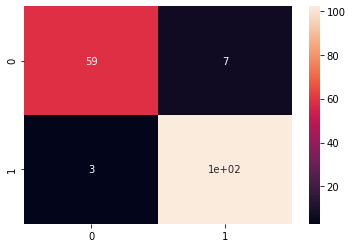

In [25]:
grid_predictions = grid.predict(X_test) 

print(sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True))

# print classification report 
print(classification_report(y_test, grid_predictions)) 
